In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [63]:
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
drivers = pd.read_csv('drivers.csv')
constructors = pd.read_csv('constructors.csv')

In [64]:
df = pd.merge(results, races[['raceId', 'year', 'name', 'round']], on = 'raceId', how = 'left')
df = pd.merge(df, drivers[['driverId', 'driverRef', 'nationality']], on = 'driverId', how = 'left')
df = pd.merge(df, constructors[['constructorId', 'name', 'nationality']], on = 'constructorId', how = 'left')

In [65]:
df.shape

(25660, 25)

In [66]:
df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25655,25661,1086,825,210,20,13,16,16,16,0.0,...,1:23.511,188.856,11,2022,Hungarian Grand Prix,13,kevin_magnussen,Danish,Haas F1 Team,American
25656,25662,1086,848,3,23,17,17,17,17,0.0,...,1:23.047,189.911,11,2022,Hungarian Grand Prix,13,albon,Thai,Williams,British
25657,25663,1086,849,3,6,19,18,18,18,0.0,...,1:22.478,191.221,11,2022,Hungarian Grand Prix,13,latifi,Canadian,Williams,British
25658,25664,1086,852,213,22,16,19,19,19,0.0,...,1:23.538,188.795,12,2022,Hungarian Grand Prix,13,tsunoda,Japanese,AlphaTauri,Italian


In [67]:
# drop columns

df.drop(['number', 'position', 'positionText', 'laps', 'fastestLap', 'statusId', 'resultId', 'raceId', 'driverId', 'constructorId'], axis=1, inplace=True)

In [68]:
df.head()

,grid,positionOrder,points,time,milliseconds,rank,fastestLapTime,fastestLapSpeed,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [69]:
df.shape

(25660, 15)

In [70]:
df.rename(columns={'rank': 'fastestLapRank', 'name_x': 'gpName', 'nationality_x': 'driverNationality', 'name_y': 'constructorName', 'nationality_y' : 'constructorNationality', 'driverRef': 'driver'}, inplace=True)

In [71]:
df.head()

,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,year,gpName,round,driver,driverNationality,constructorName,constructorNationality
0,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [72]:
# rearrange column
df.columns

Index(['grid', 'positionOrder', 'points', 'time', 'milliseconds',
       'fastestLapRank', 'fastestLapTime', 'fastestLapSpeed', 'year', 'gpName',
       'round', 'driver', 'driverNationality', 'constructorName',
       'constructorNationality'],
      dtype='object')

In [73]:
df=df[['year', 'gpName', 'round', 'driver', 'constructorName', 'grid', 'positionOrder', 'points', 'time', 'milliseconds', 'fastestLapRank', 
      'fastestLapTime', 'fastestLapSpeed', 'driverNationality', 'constructorNationality']]

In [74]:
df.head()

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,British,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,German,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,German,British
3,2008,Australian Grand Prix,1,alonso,Renault,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,Spanish,French
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,Finnish,British


In [75]:
df

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,British,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,German,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,German,British
3,2008,Australian Grand Prix,1,alonso,Renault,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,Spanish,French
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,Finnish,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25655,2022,Hungarian Grand Prix,13,kevin_magnussen,Haas F1 Team,13,16,0.0,\N,\N,15,1:23.511,188.856,Danish,American
25656,2022,Hungarian Grand Prix,13,albon,Williams,17,17,0.0,\N,\N,12,1:23.047,189.911,Thai,British
25657,2022,Hungarian Grand Prix,13,latifi,Williams,19,18,0.0,\N,\N,8,1:22.478,191.221,Canadian,British
25658,2022,Hungarian Grand Prix,13,tsunoda,AlphaTauri,16,19,0.0,\N,\N,16,1:23.538,188.795,Japanese,Italian


In [76]:
df.describe()

,year,round,grid,positionOrder,points
count,25660.000000,25660.000000,25660.000000,25660.000000,25660.000000
mean,1990.029072,8.318550,11.187256,12.892673,1.854523
std,19.229104,4.904752,7.251983,7.721729,4.131527
min,1950.000000,1.000000,0.000000,1.000000,0.000000
25%,1976.000000,4.000000,5.000000,6.000000,0.000000
50%,1990.000000,8.000000,11.000000,12.000000,0.000000
75%,2007.000000,12.000000,17.000000,18.000000,2.000000
max,2022.000000,22.000000,34.000000,39.000000,50.000000


In [77]:
df = df[df['year']!=2019]

In [78]:
df.head()

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,British,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,German,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,German,British
3,2008,Australian Grand Prix,1,alonso,Renault,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,Spanish,French
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,Finnish,British


In [79]:
# sort values
df = df.sort_values(by=['year', 'round', 'positionOrder'], ascending = [False, True, True])

In [80]:
df.head()

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
25400,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584,1,1:34.570,206.018,Monegasque,Italian
25401,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182,3,1:35.740,203.501,Spanish,Italian
25402,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259,5,1:36.228,202.469,British,German
25403,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795,6,1:36.302,202.313,British,German
25404,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338,8,1:36.623,201.641,Danish,American


In [81]:
# replace /N values in the time column with NAN
df.time.replace('\\N', np.nan, inplace=True)
df.milliseconds.replace('\\N', np.nan, inplace=True)
df.fastestLapRank.replace('\\N', np.nan, inplace=True)
df.fastestLapTime.replace('\\N', np.nan, inplace=True)
df.fastestLapSpeed.replace('\\N', np.nan, inplace=True)

In [82]:
# change datatypes
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastestLapRank = df.fastestLapRank.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [83]:
# reset index
df.reset_index(drop=True, inplace=True)

In [84]:
df.shape

(25240, 15)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25240 entries, 0 to 25239
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    25240 non-null  int64  
 1   gpName                  25240 non-null  object 
 2   round                   25240 non-null  int64  
 3   driver                  25240 non-null  object 
 4   constructorName         25240 non-null  object 
 5   grid                    25240 non-null  int64  
 6   positionOrder           25240 non-null  int64  
 7   points                  25240 non-null  float64
 8   time                    6768 non-null   object 
 9   milliseconds            6767 non-null   float64
 10  fastestLapRank          6991 non-null   float64
 11  fastestLapTime          6790 non-null   object 
 12  fastestLapSpeed         6790 non-null   float64
 13  driverNationality       25240 non-null  object 
 14  constructorNationality  25240 non-null

In [86]:
df.head(10)

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584.0,1.0,1:34.570,206.018,Monegasque,Italian
1,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182.0,3.0,1:35.740,203.501,Spanish,Italian
2,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259.0,5.0,1:36.228,202.469,British,German
3,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795.0,6.0,1:36.302,202.313,British,German
4,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338.0,8.0,1:36.623,201.641,Danish,American
5,2022,Bahrain Grand Prix,1,bottas,Alfa Romeo,6,6,8.0,+16.119,5869703.0,7.0,1:36.599,201.691,Finnish,Swiss
6,2022,Bahrain Grand Prix,1,ocon,Alpine F1 Team,11,7,6.0,+19.423,5873007.0,14.0,1:37.110,200.630,French,French
7,2022,Bahrain Grand Prix,1,tsunoda,AlphaTauri,16,8,4.0,+20.386,5873970.0,13.0,1:37.104,200.642,Japanese,Italian
8,2022,Bahrain Grand Prix,1,alonso,Alpine F1 Team,8,9,2.0,+22.390,5875974.0,10.0,1:36.733,201.412,Spanish,French
9,2022,Bahrain Grand Prix,1,zhou,Alfa Romeo,15,10,1.0,+23.064,5876648.0,9.0,1:36.685,201.512,Chinese,Swiss


In [87]:
sns.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

([], [])

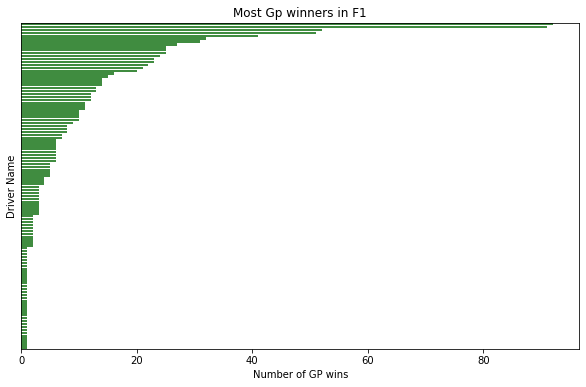

In [91]:
# GP winners
driver_winner =df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

# Barplot

sns.barplot(data=driver_winner, y='driver', x='positionOrder', color='green', alpha=0.8)
plt.title('Most Gp winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')
plt.yticks([])

In [93]:
# create a new dataFrame of top ten GP winners

top10Drivers = driver_winner.head(10)

print(top10Drivers)

               driver  positionOrder
0            hamilton             92
1  michael_schumacher             91
2              vettel             52
3               prost             51
4               senna             41
5              alonso             32
6             mansell             31
7             stewart             27
8               clark             25
9               lauda             25
